<a href="https://colab.research.google.com/github/wiiiiish/2022-machine_learning/blob/main/s_LinearRegression_model_0511.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

drive  sample_data


In [2]:
%cd drive/MyDrive/Colab\ Notebooks/2022-04-27\ 데이터

/content/drive/MyDrive/Colab Notebooks/2022-04-27 데이터


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
weather_aod_0505_0523 = pd.read_csv('./data/weather_aod_0505_0523.csv', encoding='utf-8')
weather_aod_0505_0523 = weather_aod_0505_0523.drop([weather_aod_0505_0523.columns[0], weather_aod_0505_0523.columns[1]], axis=1)
weather_aod_0505_0523

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,05-05 00:00:00,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,05-05 00:00:10,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,05-05 00:00:20,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,05-05 00:00:30,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,05-05 00:00:40,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...
155516,05-22 23:59:20,21.920166,0.0,0.063679,98.978736,0.0,9.912798,1509.778732,23.579250,0.0
155517,05-22 23:59:30,22.025666,0.0,0.171538,99.084766,0.0,9.914665,1085.456078,23.545740,0.0
155518,05-22 23:59:40,21.930888,0.0,0.092957,99.040640,0.0,9.938890,1305.816996,23.582532,0.0
155519,05-22 23:59:50,22.086412,0.0,0.184221,99.034333,0.0,9.945624,793.150729,23.584564,0.0


In [64]:
# 5월6일 01:00:00 ~ 5월12일 01:00:00 까지의 날씨 (한 시간 후의 날씨 데이터)
after_hour_weather = weather_aod_0505_0523.loc[9000:60840,'date_time':'ground_temp']
after_hour_weather

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
9000,05-06 01:00:00,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062
9001,05-06 01:00:10,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084
9002,05-06 01:00:20,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159
9003,05-06 01:00:30,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513
9004,05-06 01:00:40,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097
...,...,...,...,...,...,...,...,...,...
60836,05-12 00:59:20,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113
60837,05-12 00:59:30,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968
60838,05-12 00:59:40,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284
60839,05-12 00:59:50,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812


In [75]:
after_hour_weather.to_csv('./data/after_hour_weather.csv')

In [77]:
after_hour_weather = pd.read_csv('./data/after_hour_weather.csv', encoding='utf-8')
after_hour_weather = after_hour_weather.drop(after_hour_weather.columns[0], axis=1)
after_hour_weather

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
0,05-06 01:00:00,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062
1,05-06 01:00:10,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084
2,05-06 01:00:20,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159
3,05-06 01:00:30,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513
4,05-06 01:00:40,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097
...,...,...,...,...,...,...,...,...,...
51836,05-12 00:59:20,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113
51837,05-12 00:59:30,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968
51838,05-12 00:59:40,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284
51839,05-12 00:59:50,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812


In [68]:
# 5월6일 00:00:00 ~ 5월12일 00:00:00 까지의 발전량 (현재 발전량)
now_aod = weather_aod_0505_0523.loc[8640:60480, 'aod']
now_aod = pd.DataFrame(now_aod)
now_aod

,aod
8640,0.0
8641,0.0
8642,0.0
8643,0.0
8644,0.0
...,...
60476,0.0
60477,0.0
60478,0.0
60479,0.0


In [71]:
now_aod.to_csv('./data/now_aod.csv')

In [73]:
now_aod = pd.read_csv('./data/now_aod.csv', encoding='utf-8')
now_aod = now_aod.drop(now_aod.columns[0], axis=1)
now_aod

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
51836,0.0
51837,0.0
51838,0.0
51839,0.0


In [84]:
now_aod.columns = ['now_aod']
now_aod

,now_aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
51836,0.0
51837,0.0
51838,0.0
51839,0.0


In [79]:
# 5월5일 23:00:00 ~ 5월11일 23:00:00까지의 발전량 (한 시간 전의 발전량)
before_hour_aod = weather_aod_0505_0523.loc[8280:60120, 'aod']
pd.DataFrame(before_hour_aod)

,aod
8280,0.0
8281,0.0
8282,0.0
8283,0.0
8284,0.0
...,...
60116,0.0
60117,0.0
60118,0.0
60119,0.0


In [80]:
before_hour_aod.to_csv('./data/before_hour_aod.csv')

In [82]:
before_hour_aod = pd.read_csv('./data/before_hour_aod.csv', encoding='utf-8')
before_hour_aod = before_hour_aod.drop(before_hour_aod.columns[0], axis=1)
before_hour_aod

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
51836,0.0
51837,0.0
51838,0.0
51839,0.0


In [86]:
before_hour_aod.columns = ['before_hour_aod']
before_hour_aod

,before_hour_aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
51836,0.0
51837,0.0
51838,0.0
51839,0.0


In [89]:
data = pd.concat([after_hour_weather, now_aod, before_hour_aod], axis=1)
data

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,05-06 01:00:00,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062,0.0,0.0
1,05-06 01:00:10,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084,0.0,0.0
2,05-06 01:00:20,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159,0.0,0.0
3,05-06 01:00:30,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513,0.0,0.0
4,05-06 01:00:40,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
51836,05-12 00:59:20,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113,0.0,0.0
51837,05-12 00:59:30,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968,0.0,0.0
51838,05-12 00:59:40,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284,0.0,0.0
51839,05-12 00:59:50,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812,0.0,0.0


In [90]:
data.to_csv('./data/all_data_sum.csv')

In [95]:
# 5월6일 01:00:00 ~ 5월12일 01:00:00 까지의 발전량 (예측해야할 답)
pred_aod = weather_aod_0505_0523.loc[9000:60840,'aod']
pred_aod = pd.DataFrame(pred_aod)
pred_aod

,aod
9000,0.0
9001,0.0
9002,0.0
9003,0.0
9004,0.0
...,...
60836,0.0
60837,0.0
60838,0.0
60839,0.0


In [96]:
pred_aod.to_csv('./data/pred_aod.csv')

In [99]:
pred_aod = pd.read_csv('./data/pred_aod.csv', encoding='utf-8')
pred_aod = pred_aod.drop(pred_aod.columns[0], axis=1)
pred_aod

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
51836,0.0
51837,0.0
51838,0.0
51839,0.0


In [145]:
# train 데이터와 test 데이터 나누기
# train 데이터는 4일치 (5월6일 00:00:00 ~ 5월9일 23:00:00)
x_train = data.loc[:34200, 'temperature':'before_hour_aod']
x_train

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062,0.0,0.0
1,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084,0.0,0.0
2,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159,0.0,0.0
3,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513,0.0,0.0
4,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34196,24.073217,0.0,1.284951,89.005958,0.0,4.471558,882.632247,26.128100,0.0,0.0
34197,24.181822,0.0,1.317443,91.923205,0.0,2.536581,905.367195,26.246212,0.0,0.0
34198,23.765830,0.0,1.350209,89.787909,0.0,7.882563,908.718558,26.224739,0.0,0.0
34199,24.013697,0.0,1.417440,90.933227,0.0,2.849746,874.759202,26.427768,0.0,0.0


In [144]:
x_train.to_csv('./data/X_train.csv')

In [146]:
X_train = np.array(x_train)
print(f"X_train.shape = {X_train.shape}")
X_train

X_train.shape = (34201, 10)


array([[19.86437382,  0.        ,  0.82248939, ..., 20.42906155,
         0.        ,  0.        ],
       [19.90810568,  0.        ,  0.88339129, ..., 20.59108412,
         0.        ,  0.        ],
       [20.02728917,  0.        ,  0.82892439, ..., 20.36515904,
         0.        ,  0.        ],
       ...,
       [23.76582951,  0.        ,  1.35020924, ..., 26.22473944,
         0.        ,  0.        ],
       [24.01369698,  0.        ,  1.41743983, ..., 26.42776813,
         0.        ,  0.        ],
       [23.4953066 ,  0.        ,  1.3085976 , ..., 25.61786865,
         0.        ,  0.        ]])

In [147]:
y_train = pred_aod.loc[:34200, :]
y_train

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
34196,0.0
34197,0.0
34198,0.0
34199,0.0


In [148]:
y_train.to_csv('./data/y_train.csv')

In [149]:
y_train = np.array(y_train)
print(f"y_train.shape = {y_train.shape}")
y_train

y_train.shape = (34201, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [153]:
# test 데이터는 2일치 (5월10일 00:00:00 ~ 5월12일 00:00:00)
x_test = data.loc[34560:, 'date_time':'before_hour_aod']
x_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
34560,05-10 01:00:00,23.491114,0.0,1.350743,92.967544,0.0,5.941786,1166.524671,25.372017,0.0,0.0
34561,05-10 01:00:10,23.551742,0.0,1.380648,93.830948,0.0,6.086599,1109.720781,25.303795,0.0,0.0
34562,05-10 01:00:20,23.576351,0.0,1.402363,93.879005,0.0,5.981344,1192.956846,25.384583,0.0,0.0
34563,05-10 01:00:30,23.543496,0.0,1.340201,93.768065,0.0,6.014781,1013.211345,25.387069,0.0,0.0
34564,05-10 01:00:40,23.578195,0.0,1.327544,93.323532,0.0,6.043455,999.245202,25.346004,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
51836,05-12 00:59:20,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113,0.0,0.0
51837,05-12 00:59:30,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968,0.0,0.0
51838,05-12 00:59:40,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284,0.0,0.0
51839,05-12 00:59:50,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812,0.0,0.0


In [151]:
x_test.to_csv('./data/X_test.csv')

In [155]:
X_test = pd.read_csv('./data/X_test.csv', encoding='utf-8')
X_test = X_test.drop(X_test.columns[0], axis=1)
X_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,05-10 01:00:00,23.491114,0.0,1.350743,92.967544,0.0,5.941786,1166.524671,25.372017,0.0,0.0
1,05-10 01:00:10,23.551742,0.0,1.380648,93.830948,0.0,6.086599,1109.720781,25.303795,0.0,0.0
2,05-10 01:00:20,23.576351,0.0,1.402363,93.879005,0.0,5.981344,1192.956846,25.384583,0.0,0.0
3,05-10 01:00:30,23.543496,0.0,1.340201,93.768065,0.0,6.014781,1013.211345,25.387069,0.0,0.0
4,05-10 01:00:40,23.578195,0.0,1.327544,93.323532,0.0,6.043455,999.245202,25.346004,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17276,05-12 00:59:20,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113,0.0,0.0
17277,05-12 00:59:30,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968,0.0,0.0
17278,05-12 00:59:40,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284,0.0,0.0
17279,05-12 00:59:50,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812,0.0,0.0


In [156]:
X_test.to_csv('./data/X_test.csv')

In [158]:
X_test = X_test.loc[:, 'temperature':]
X_test

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,23.491114,0.0,1.350743,92.967544,0.0,5.941786,1166.524671,25.372017,0.0,0.0
1,23.551742,0.0,1.380648,93.830948,0.0,6.086599,1109.720781,25.303795,0.0,0.0
2,23.576351,0.0,1.402363,93.879005,0.0,5.981344,1192.956846,25.384583,0.0,0.0
3,23.543496,0.0,1.340201,93.768065,0.0,6.014781,1013.211345,25.387069,0.0,0.0
4,23.578195,0.0,1.327544,93.323532,0.0,6.043455,999.245202,25.346004,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17276,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113,0.0,0.0
17277,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968,0.0,0.0
17278,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284,0.0,0.0
17279,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812,0.0,0.0


In [163]:
X_test = np.array(X_test)
print(f"X_test.shape = {X_test.shape}")
X_test

X_test.shape = (17281, 10)


array([[23.4911141 ,  0.        ,  1.3507426 , ..., 25.37201717,
         0.        ,  0.        ],
       [23.55174195,  0.        ,  1.38064794, ..., 25.30379528,
         0.        ,  0.        ],
       [23.57635055,  0.        ,  1.40236331, ..., 25.38458342,
         0.        ,  0.        ],
       ...,
       [23.02795509,  0.        ,  1.19967132, ..., 23.3102835 ,
         0.        ,  0.        ],
       [23.05043681,  0.        ,  0.99386042, ..., 23.28981171,
         0.        ,  0.        ],
       [22.58572819,  0.        ,  0.97115495, ..., 22.54947011,
         0.        ,  0.        ]])

In [160]:
y_test = pred_aod.loc[34560:, :]
y_test.to_csv('./data/y_test.csv')

In [161]:
y_test = pd.read_csv('./data/y_test.csv', encoding='utf-8')
y_test = y_test.drop(y_test.columns[0], axis=1)
y_test

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [162]:
y_test.to_csv('./data/y_test.csv')

In [164]:
y_test = np.array(y_test)
print(f"y_test.shape = {y_test.shape}")
y_test

y_test.shape = (17281, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [100]:
from sklearn.linear_model import LinearRegression # 회귀 모델

In [165]:
model = LinearRegression()

In [166]:
model.fit(X_train, y_train)  # 지도학습 방법 (회귀)

LinearRegression()

In [167]:
pred = model.predict(X_test)

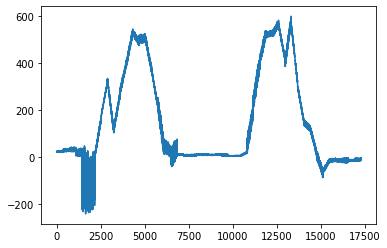

In [168]:
plt.plot(pred)

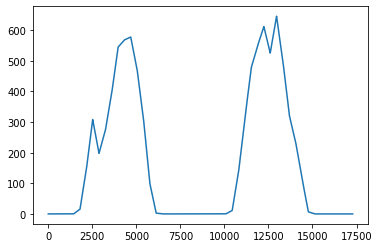

In [169]:
plt.plot(y_test)

In [172]:
model.score(X_test,y_test)

0.8949905246794347

In [173]:
# 모델 저장
import pickle
with open('LinearRegression_s_pred_model.pickle', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)